# Machine Learning for Regression 

In [3]:
import pandas as pd 
import numpy as np 

## Data Preparation

In [4]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [5]:
df = pd.read_csv(url)
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [6]:
# Lower case and add an underscore to the columns' headers
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


We want to apply the same transformation to the values of columns with dtype == object.

In [8]:
# returns a series with an index (make, model, etc...) and a value (object, object, etc...)
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [9]:
# We want to access the indexes
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [10]:
for col in strings:
    df[col]= df[col].str.lower().str.replace(' ', '_') 

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) # see first 5 unique values
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

**Distribution of price**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

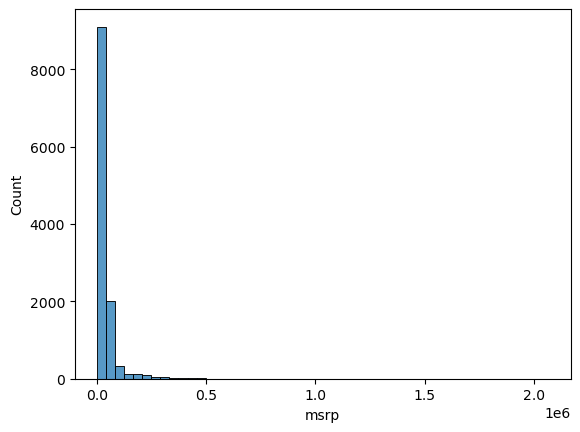

In [18]:
sns.histplot(df['msrp'], bins = 50)
plt.show()

Most of the cars price are in the left side of the **long tail** distribution.

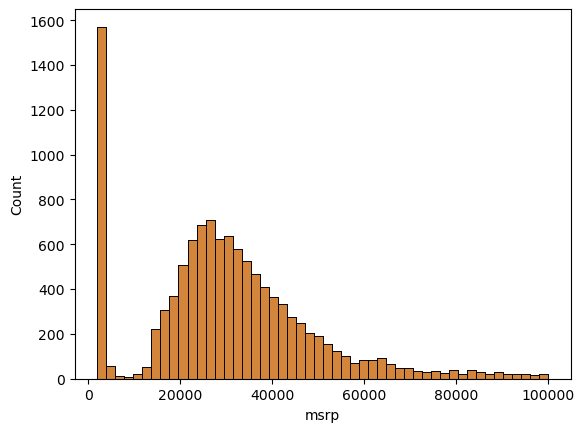

In [22]:
sns.histplot(df['msrp'][df['msrp'] < 100000], bins = 50)
plt.show()

This is a common distribution for prices, where most of the products / services are cheap. This **long tail** distribution is not very good to train machine learning models. 

To get rid of this, we apply a **logarithmic** distribution.
    - For large values, the value of the logarithmic is not that large. There's not much of an increase in from one log to another.
    - **Problem:** It complains if it has zeros --> use **np.log1p()** to +1 all the values and guarantee there are no zeros.

In [24]:
price_logs = np.log1p(df.msrp)

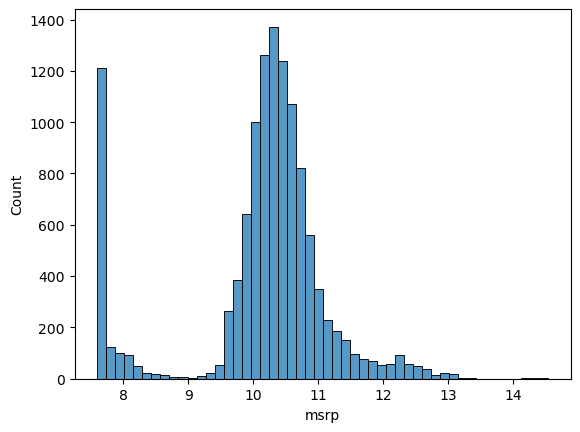

In [25]:
sns.histplot(price_logs, bins=50)
plt.show()

The distribution it's more similar to a normal distribution (which favors our model), in spite of that pike on the left side. 

**Missing Values**

In [27]:
df.isnull().sum()[df.isnull().sum()>0]

engine_fuel_type       3
engine_hp             69
engine_cylinders      30
number_of_doors        6
market_category     3742
dtype: int64

## Linear Regression - vector form

## Setting up the validation framework

## Linear Regression

## Training a Linear Regression model

## Car price baseline model

## RMSE

## Validating the model

## Simple feature engineering

## Categorical variables

## Regularization

## Tuning the model

## Using the model